<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machiine_Learning_Models/blob/main/Naive_Bayes_Correlations_Multi_Variables_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import matplotlib

In [ ]:
# READING DATASET FROM CSV

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# DICTIONARIES OF VARIABLES AND LABELS

y_labels = {1:"Anaemia", 3:"Diabetes", 5:"High Blood Preasure",
            9:"Sex", 10:"Smoking", 12:"Death Event"}
x_variables = {0: "Age", 2:"Creatinine Phosphokinase", 4:"Ejection Fraction",
               6:"Platelets", 7: "Serum Creatinine", 8:"Serum Sodium", 11:"Time"}

 
sc = StandardScaler()

# EMPTY MATRIX WHERE BE PLACED ACCURACIES

Acc_Matrix = np.empty((6,21))

In [ ]:
# FUNCTION TO CALCULATE ACCURACY IN GAUSSIAN_NB OBTAINING VARIABLES FROM DATAFRAME

def NaiveBayesFuct(a,b,c):
  x = data.iloc[:,[a,b]].values
  y = data.iloc[:,c].values
  x_train ,x_test , y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 0) 
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)
  classifier = GaussianNB()
  classifier.fit(x_train, y_train)
  acc = classifier.score(x_test, y_test)
  return acc
                              


In [ ]:
# OBTAINING EVERY DIFFERENT COMBINATION OF VARIABLES TO implement GAUSSIAN_NB

p = 0; q=0
for k,v in y_labels.items():
  for i,j in x_variables.items():
    for u,w in x_variables.items():
      if i==u:
        break
      else:
        acc = NaiveBayesFuct(u,i,k)
        Acc_Matrix[p][q] = acc
        q = q+1
    
  p = p + 1
  q = 0
 

In [ ]:
# Labels of every comparation to print in the color matrix 

x_labels = []
for i,j in x_variables.items():
    for u,w in x_variables.items():
      if i==u:
        break
      else:
        x_labels.append(j+ " vs "+w)

y_label = list(y_labels.values())

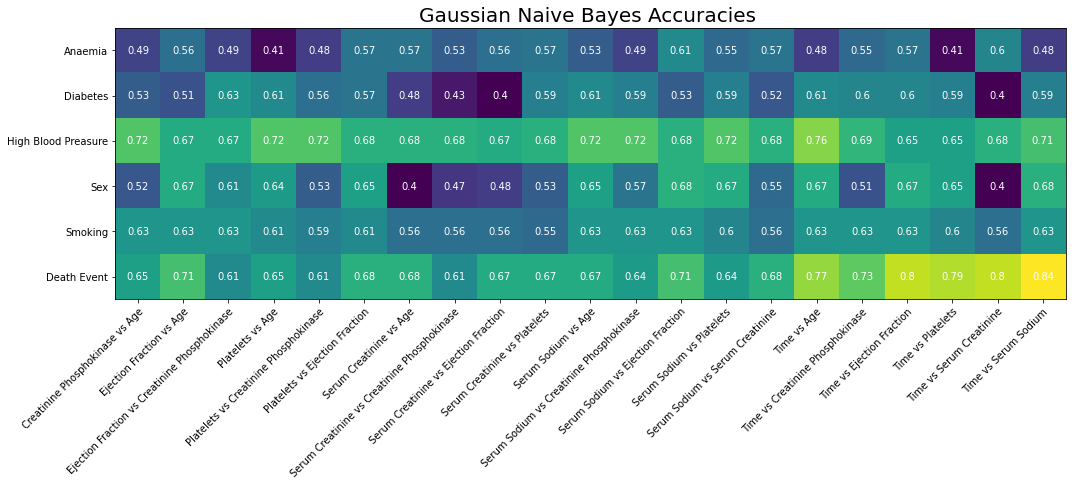

<Figure size 1080x432 with 0 Axes>

In [ ]:
# PLOT IN MATPLOTLIB
from IPython.core.pylabtools import figsize

vegetables = y_label
farmers = x_labels

harvest = Acc_Matrix.round(2)

fig, ax = plt.subplots()
plt.figure(figsize(15,6)) 
im = ax.imshow(harvest)

ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Gaussian Naive Bayes Accuracies ", fontsize=20)
fig.tight_layout()
plt.show()